# Exploración de Datos

In [ ]:
#!pip install "numpy<=1.24" --force-reinstall
#!pip install --upgrade --force-reinstall "numpy<=1.24"
!pip install --upgrade --force-reinstall "numpy<=1.24"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.0 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is 

In [ ]:
!pip install pmdarima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing
import plotly.graph_objs as go
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.7 MB/s eta 0:00:00


In [ ]:
df = pd.read_excel("data.xlsx")
df.head()

,mes,año,demanda
0,agosto,2013,12517
1,septiembre,2013,13268
2,octubre,2013,14733
3,noviembre,2013,13669
4,diciembre,2013,16503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mes      48 non-null     object
 1   año      48 non-null     int64 
 2   demanda  48 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
print(df.columns)

Index(['mes', 'año', 'demanda'], dtype='object')


In [ ]:
df['mes'].dtype #Object

dtype('O')

In [ ]:
df.isnull().sum()

,0
mes,0
año,0
demanda,0


In [ ]:
df.describe()

,año,demanda
count,48.000000,48.000000
mean,2015.083333,17062.875000
std,1.234837,3518.296956
min,2013.000000,11938.000000
25%,2014.000000,14402.500000
50%,2015.000000,16563.000000
75%,2016.000000,18988.500000
max,2017.000000,28038.000000


# Columna nueva

Una serie temporal debe estar ordena por fecha. Debemos asegurarnos que la serie esta ordenado por año y mes.

Primera paso:
1.   Creamos una columna nueva **mes_numerico** donde tenemos el mes en numero

In [ ]:
# Mes a int
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12

}

# Nueva columna con los valores int
# Se utiliza map para que cada valor en la columna mes, se busca el valor asociado en el diccionario y se anade el número correspondiente
df['mes_numerico'] = df['mes'].map(meses)
df[['mes', 'mes_numerico']].head()

,mes,mes_numerico
0,agosto,8
1,septiembre,9
2,octubre,10
3,noviembre,11
4,diciembre,12


In [ ]:
print(df[['año', 'mes_numerico']].isnull().sum())

año             0
mes_numerico    0
dtype: int64


Segundo paso:
   2. Creamos una columna nueva llamada **fecha** donde uniremos el año, el **mes_numerico** y añadiremos 1 como dia para tener una fecha completa.

In [ ]:
# Nueva columna donde esta la fecha completa. Año, mes_numerico y dia=1
df['fecha'] = pd.to_datetime(df['año'].astype(str) + '-' + df['mes_numerico'].astype(str) + '-1')

Luego de tener la columna fecha, el tercer paso es:

  3. Añadir la columna **fecha** como index, esto nos permitira organizar los datos por tiempo.

In [ ]:
print("Antes de tener fecha como index:")
df.head()  # Ver cómo es el DataFrame sin índice de fecha

Antes de tener fecha como index:


,mes,año,demanda,mes_numerico,fecha
0,agosto,2013,12517,8,2013-08-01
1,septiembre,2013,13268,9,2013-09-01
2,octubre,2013,14733,10,2013-10-01
3,noviembre,2013,13669,11,2013-11-01
4,diciembre,2013,16503,12,2013-12-01


In [ ]:
df.set_index('fecha', inplace=True)

print("Después de set_index:")
df.head()

Después de set_index:


,mes,año,demanda,mes_numerico
fecha,,,,
2013-08-01,agosto,2013,12517,8
2013-09-01,septiembre,2013,13268,9
2013-10-01,octubre,2013,14733,10
2013-11-01,noviembre,2013,13669,11
2013-12-01,diciembre,2013,16503,12


Al ya asegurarnos que la serie esta ordenado por tiempo, podemos ver la serie temporal en un gráfico.


In [ ]:
fig = px.line(df, x=df.index, y='demanda', title='Serie Temporal de Demanda')
fig.show()

# Modelo Suavizado Exponencial Triple (Holt)

Entre el Alisado Exponencial Doble y el Alisado Exponencial Triple, escogimos el Alisado Exponencial Triple (Holt) ya que nuestra serie tiene estacionalidad y tendencia.

* `Holt (Alisado Exponencial Doble)`: Cuando la serie tienes tendencia, pero no estacionalidad.
* `Holt-Winters (Suavizado Exponencial Triple)`: Cuando la serie tiene tendencia y estacionalidad.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['demanda'],
                         mode='lines+markers',
                         name='Demanda'))

El gráfico muestra la evolución de una variable con una clara estacionalidad y un pico significativo (28.038k) a principios de 2017. En conclusion podemos ver que es una serie temporal con estacionalidad (presencia de fluctuaciones regulares) y una clara tendencia.

Como lo hizo el prof.

In [ ]:
HoltWinters1 = ExponentialSmoothing(
    df['demanda'], # serie que quiero pronostica
    seasonal_periods=12, #serie temporal tiene una estacionalidad de 12 períodos
    trend="add", # incluir un componente de tendencia aditivo
    seasonal="add", # incluir un componente estacional aditivo
    #use_boxcox=True, #transformación logarítmica
    # si las series muestran muchas variaciones en la estacionalidad
    # metodo funciona mejor con log
    initialization_method="estimated", # nivel, tendencia y componentes estacionales estimados automáticamente
).fit()
print(HoltWinters1.summary())

forecast_modelo1 = HoltWinters1.forecast(12)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                       ExponentialSmoothing Model Results                       
Dep. Variable:                  demanda   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                       63116813.237
Optimized:                         True   AIC                            708.286
Trend:                         Additive   BIC                            738.225
Seasonal:                      Additive   AICC                           731.872
Seasonal Periods:                    12   Date:                 Tue, 25 Mar 2025
Box-Cox:                          False   Time:                         20:46:23
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3339483                alpha                 True
smoothing_trend          

### Summary:
- `Dep. Variable: demanda`: Indica que la variable dependiente (la que se está pronosticando) es 'demanda'.
- `No. Observations: 48`: Indica que el modelo se ajustó con 48 observaciones.
- `Model: ExponentialSmoothing`: Confirma que se utilizó el modelo de Suavizado Exponencial.
- `Optimized: True`: Indica que los parámetros del modelo fueron optimizados.
- `Trend: Additive`: Confirma que se utilizó una tendencia aditiva.
- `Seasonal: Additive`: Confirma que se utilizó una estacionalidad aditiva.
- `Seasonal Periods: 12`: Confirma el período estacional de 12.
- `SSE: 63116813.237`: Suma de Errores al Cuadrado, muy útil para comparar modelos.
- `AIC: 708.286, BIC: 738.225, AICC: 731.872`: Criterios de Información de Akaike (AIC), Bayesiano (BIC) y corregido (AICC). Se utilizan para comparar la calidad de diferentes modelos y entre más bajos sean los valores mejor es el modelo.

->  Parámetros de Suavizado (Alfa, Beta, Gamma):  Valores cercanos a 1 hacen que el modelo sea muy sensible a los cambios recientes. Valores cercanos a 0 hacen que el modelo sea más estable y menos sensible a los cambios.


- `smoothing_level: 0.3339483 (alpha)`: El parámetro de suavizado para el `nivel`. Un `Alfa` de 0.33 significa que es un *peso moderado*.
- `smoothing_trend: 0.0053982 (beta)`: El parámetro de suavizado para la `tendencia`. Un `beta` de 0.005 es muy bajo, lo que significa que la *tendencia cambia muy lentamente*.
- `smoothing_seasonal: 0.0106606 (gamma)`: El parámetro de suavizado para la `estacionalidad` (patrones que se repiten). Un `gamma` de 0.0106 es muy bajo, lo que significa que los *patrones estacionales cambian muy lentamente*.


In [ ]:
HoltWinters2 = ExponentialSmoothing(
    df['demanda'],
    seasonal_periods=12,
    trend="add", # no cambia ya que asumes que es una linea recta
    seasonal="mul", # componente estacional multiplicativo
    #use_boxcox=True, #transformación logarítmica
    initialization_method="estimated", # nivel, tendencia y componentes estacionales deben ser estimados automáticamente por el modelo
).fit()
print(HoltWinters2.summary())

forecast_modelo2 = HoltWinters2.forecast(12)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  demanda   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                       49484984.581
Optimized:                         True   AIC                            696.607
Trend:                         Additive   BIC                            726.546
Seasonal:                Multiplicative   AICC                           720.193
Seasonal Periods:                    12   Date:                 Tue, 25 Mar 2025
Box-Cox:                          False   Time:                         20:46:23
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3585714                alpha                 True
smoothing_trend          

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Summary:
- `Dep. Variable: demanda`: Indica que la variable dependiente (la que se está pronosticando) es 'demanda'.
- `No. Observations: 48`: Indica que el modelo se ajustó con 48 observaciones.
- `Model: ExponentialSmoothing`: Confirma que se utilizó el modelo de Suavizado Exponencial.
- `Optimized: True`: Indica que los parámetros del modelo fueron optimizados.
- `Trend: Additive`: Confirma que se utilizó una tendencia aditiva.
- `Seasonal: Multiplicative`: Confirma que se utilizó una estacionalidad multiplicativa.
- `Seasonal Periods: 12`: Confirma el período estacional de 12.
- `SSE: 49484984.581`: Suma de Errores al Cuadrado. Es menor que el modelo anterior, lo que indica que este modelo podría ser mejor.
- `AIC: 696.607, BIC: 726.546, AICC: 720.193`: Criterios de Información de Akaike (AIC), Bayesiano (BIC) y corregido (AICC). Son menores que el modelo anterior, lo que refuerza la idea de que este modelo podría ser mejor.

- `smoothing_level: 0.3585714 (alpha)`: El parámetro de suavizado para el *nivel es moderado*.
- `smoothing_trend: 0.0001 (beta)`: El parámetro de suavizado para la *tendencia es extremadamente bajo lo que indica estabilidad*.
- `smoothing_seasonal: 0.0001 (gamma)`: El parámetro de suavizado para la *estacionalidad es extremadamente bajo lo que indica estabilidad*.

Las diferencias entre los 2 modelos:
- `Estacionalidad Multiplicativa`: La diferencia más importante es el uso de seasonal="mul". Esto significa que los componentes estacionales se multiplican por el nivel y la tendencia en lugar de sumarse. Esto es adecuado cuando la amplitud de las fluctuaciones estacionales cambia con el nivel de la serie.
- `Menor SSE, AIC, BIC y AICC`: Los valores más bajos en estas métricas indican que el modelo con estacionalidad multiplicativa se ajusta mejor a los datos en comparación con el modelo con estacionalidad aditiva.
- `Valores de alfa, beta y gamma`: Similar al modelo anterior, estos valores controlan la velocidad de adaptación del modelo a los cambios en los datos. Los valores bajos de beta y gamma indican que la tendencia y la estacionalidad cambian lentamente.
- `Componentes estacionales iniciales (s.0 a s.11)`: En un modelo multiplicativo, estos valores representan factores de multiplicación. Un valor de 1 significa que no hay efecto estacional, un valor mayor que 1 significa un efecto estacional positivo y un valor menor que 1 significa un efecto estacional negativo.

En conclusion:
El segundo modelo nos muestra que se ajusta mejor a los datos que el modelo con estacionalidad aditiva, lo que sugiere que la amplitud de las fluctuaciones estacionales (la magnitud de los patrones estacionales) cambia con el nivel de la serie (depende del valor general).


In [ ]:
# Indices de tiempo para el gráfico
periodo=list(range(len(df['demanda'])))
periodoForecast=list(range(len(df['demanda']),len(df['demanda'])+12))

# Creating the plot
fig = go.Figure()

# Serie original
fig.add_trace(go.Scatter(x=periodo, y=df['demanda'], mode='lines+markers', line=dict(color='black'), name='Serie original'))
# Valores del fit
fig.add_trace(go.Scatter(x=periodo, y=HoltWinters1.fittedvalues, mode='lines+markers', line=dict(color='red'), name='Aditivo'))
fig.add_trace(go.Scatter(x=periodo, y=HoltWinters2.fittedvalues, mode='lines+markers', line=dict(color='blue'), name='Multiplicativo'))

# Forecast
fig.add_trace(go.Scatter(x=periodoForecast, y=forecast_modelo1, mode='lines+markers', line=dict(color='red'), name='F. Aditivo'))
fig.add_trace(go.Scatter(x=periodoForecast, y=forecast_modelo2, mode='lines+markers', line=dict(color='blue'), name='F. Multiplicativo'))

fig.show()

Podemos observar claramente cómo cada modelo se ajusta a los datos históricos y cómo se extienden sus pronósticos hacia el futuro.
- `Serie Original (Línea Negra)`: Muestra los datos históricos de la demanda. Se observa una tendencia general ascendente con fluctuaciones periódicas, lo que sugiere estacionalidad.
- `Línea Roja (Aditivo)`: Representa los valores ajustados y el pronóstico del modelo Holt-Winters aditivo. Este modelo asume que la estacionalidad tiene una magnitud constante a lo largo del tiempo.  Para el Forescast, el punto más alto tiene un valor de 29.34985k en el periodo 53.  
- `Línea Azul (Multiplicativo)`: Representa los valores ajustados y el pronóstico del modelo Holt-Winters multiplicativo. Este modelo asume que la magnitud de la estacionalidad varía proporcionalmente con el nivel de la serie.
 Para el Forescast, el punto más alto tiene un valor de 31.4322k en el periodo 53.  

En conclusion: Podemos observar que en los periodos de mayor valor, el `modelo multiplicativo` se ajusta mejor. Esto es porque la estacionalidad en este modelo se escala con el valor de la serie. Para periodos de menor valor, el `modelo aditivo` se ajusta mejor. Ahora para escoger el mejor modelo, tendriamos que calcular las métricas de error de cada modelo, y escoger el que tenga el menor error.




In [ ]:
# Los valores reales y los pronósticos
y_real = df['demanda']
y_pronostico_aditivo = HoltWinters1.fittedvalues
y_pronostico_multiplicativo = HoltWinters2.fittedvalues

# Calcular MAE (Error Absoluto Medio)
mae_aditivo = mean_absolute_error(y_real, y_pronostico_aditivo)
mae_multiplicativo = mean_absolute_error(y_real, y_pronostico_multiplicativo)

# Calcular MSE (Error Cuadrático Medio)
mse_aditivo = mean_squared_error(y_real, y_pronostico_aditivo)
mse_multiplicativo = mean_squared_error(y_real, y_pronostico_multiplicativo)

# Calcular RMSE (Raíz del Error Cuadrático Medio)
rmse_aditivo = np.sqrt(mse_aditivo)
rmse_multiplicativo = np.sqrt(mse_multiplicativo)

# Calcular MAPE (Error Porcentual Absoluto Medio)
mape_aditivo = mean_absolute_percentage_error(y_real, y_pronostico_aditivo)
mape_multiplicativo = mean_absolute_percentage_error(y_real, y_pronostico_multiplicativo)

print(f"MAE Aditivo: {mae_aditivo}")
print(f"MAE Multiplicativo: {mae_multiplicativo}")
print(f"MSE Aditivo: {mse_aditivo}")
print(f"MSE Multiplicativo: {mse_multiplicativo}")
print(f"RMSE Aditivo: {rmse_aditivo}")
print(f"RMSE Multiplicativo: {rmse_multiplicativo}")
print(f"MAPE Aditivo: {mape_aditivo}")
print(f"MAPE Multiplicativo: {mape_multiplicativo}")

MAE Aditivo: 913.2549223983054
MAE Multiplicativo: 813.1336165614217
MSE Aditivo: 1314933.6090985502
MSE Multiplicativo: 1030937.17877438
RMSE Aditivo: 1146.7055459439227
RMSE Multiplicativo: 1015.3507663730697
MAPE Aditivo: 0.055450810518279985
MAPE Multiplicativo: 0.04879365182926796


- Podemos observar claramente que el modelo multiplicativo tiene un rendimiento ligeramente mejor que el modelo aditivo en todas las métricas. Esto sugiere que el componente estacional multiplicativo captura mejor los patrones de los datos en este caso.

- El MAPE del modelo multiplicativo es de aproximadamente el 4.88%, lo que indica que, en promedio, las predicciones del modelo se desvían de los valores reales en un 4.88%

In [ ]:
# Crear DataFrame para el gráfico
datos_grafico = pd.DataFrame({
    'Real': df['demanda'],
    'Pronóstico Multiplicativo': y_pronostico_multiplicativo
})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=datos_grafico.index,
    y=datos_grafico['Real'],
    mode='lines',
    name='Demanda Real'
))

fig.add_trace(go.Scatter(
    x=datos_grafico.index,
    y=datos_grafico['Pronóstico Multiplicativo'],
    mode='lines',
    name='Pronóstico Multiplicativo'
))

#  Métricas
fig.add_annotation(
    x=0.50,  # Posición en el eje x (relativa)
    y=0.98,  # Posición en el eje y (relativa)
    xref="paper",  # Referencia al papel (en lugar de los ejes)
    yref="paper",
    text=f"MAE: {mae_multiplicativo:.2f}<br>MSE: {mse_multiplicativo:.2f}<br>RMSE: {rmse_multiplicativo:.2f}<br>MAPE: {mape_multiplicativo:.2%}",
    showarrow=False,
    align="left",
    bordercolor="#cccccc",
    borderwidth=1,
    borderpad=4
)

fig.update_layout(
    title='Demanda Real vs. Pronóstico del Modelo Multiplicativo',
    xaxis_title='Índice de Tiempo',
    yaxis_title='Demanda'
)

fig.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



2017-08-01    22301.550152
2017-09-01    22178.195606
2017-10-01    23814.376255
2017-11-01    25372.492643
2017-12-01    26077.781265
2018-01-01    29349.847655
2018-02-01    19762.590858
2018-03-01    21630.423726
2018-04-01    21398.049935
2018-05-01    23185.131537
2018-06-01    22962.487301
2018-07-01    23665.352305
Freq: MS, dtype: float64

MAE: 913.2549223983054
MSE: 1314933.6090985502
RMSE: 1146.7055459439227
MAPE: 0.055450810518279985


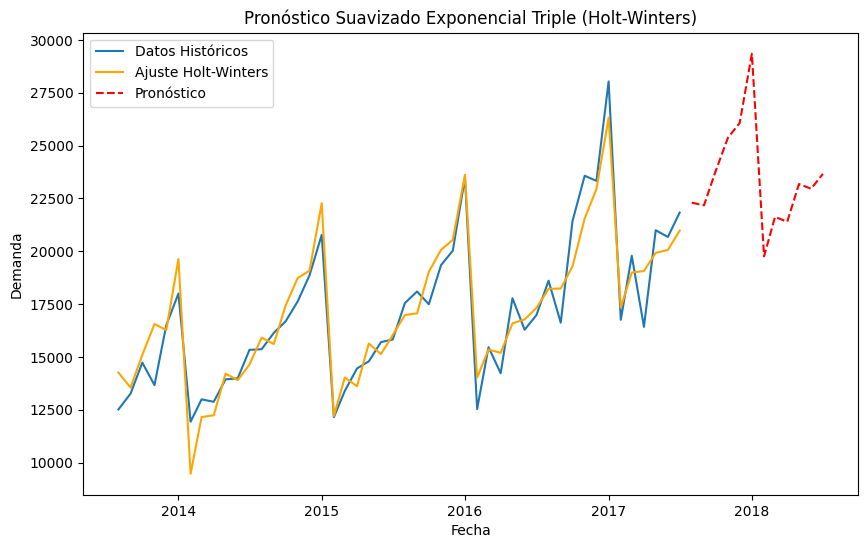

In [ ]:
# Ajustar el modelo Holt-Winters con los datos
model = ExponentialSmoothing(df['demanda'],
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)
model_fit = model.fit()

# Obtener los valores ajustados
fitted_values = model_fit.fittedvalues

# Calcular las métricas de error
mae = mean_absolute_error(df['demanda'], fitted_values)
mse = mean_squared_error(df['demanda'], fitted_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df['demanda'], fitted_values)

# Pronóstico para los próximos 12 meses
forecast = model_fit.forecast(steps=12)

# Mostrar los pronósticos
print(forecast)

# Mostrar las métricas de error
print(f"\nMAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Graficar los valores ajustados y el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(df['demanda'], label='Datos Históricos')
plt.plot(fitted_values, label='Ajuste Holt-Winters', color='orange')
plt.plot(forecast, label='Pronóstico', color='red', linestyle='dashed')
plt.title("Pronóstico Suavizado Exponencial Triple (Holt-Winters)")
plt.xlabel("Fecha")
plt.ylabel("Demanda")
plt.legend(loc='best')
plt.show()

El sistema tuvo que adivinar la frecuencia de los datos y que determinó que son datos mensuales "Month Start (MS)". Los datos en sí muestran una serie temporal de valores de demanda mensuales. Tienden a ser más altos durante los meses de invierno (diciembre y enero) y ser más bajos durante los meses de febrero, marzo y abril:
- `2017-08-01 22301.550152`: El 1 de Agosto de 2017, el valor de la demanda fue **22301.550152**.
- `2017-09-01 22178.195606`: El 1 de Septiembre de 2017, el valor de la demanda fue **22178.195606**.
- `2017-10-01 23814.376255`: El 1 de Octubre de 2017, el valor de la demanda fue **23814.376255**.
- `2017-11-01 25372.492643`:  El 1 de Noviembre de 2017, el valor de la demanda fue **25372.492643**.
- `2017-12-01 26077.781265`: El 1 de Diciembre de 2017, el valor de la demanda fue **26077.781265**.
- `2018-01-01 29349.847655`: El 1 de Enero de 2018, el valor de la demanda fue  **29349.847655**.
- `2018-02-01 19762.590858`:El 1 de Febrero de 2018, el valor de la demanda fue **19762.590858**.
- `2018-03-01 21630.423726`: El 1 de Marzo de 2018, el valor de la demanda fue  **21630.423726**.
- `2018-04-01 21398.049935`: El 1 de Abril de 2018, el valor de la demanda fue  **21398.049935**.
- `2018-05-01 23185.131537`: El 1 de Mayo de 2018, el valor de la demanda fue  **23185.131537**.
- `2018-06-01 22962.487301`:El 1 de Junio de 2018, el valor de la demanda fue  **22962.487301**.
- `2018-07-01 23665.352305`:El 1 de Julio de 2018, el valor de la demanda fue  **23665.352305**.

- El modelo muestra un rendimiento razonable, con un error porcentual promedio aceptable (MAPE).
- La diferencia entre el MAE y el RMSE indica que hay algunos errores más grandes que influyen en el valor del RMSE.
- El modelo tiene un nivel de precisión aceptable.

Grafico:
- `Datos Históricos (Línea Azul)`: Muestra la serie temporal original de la demanda. Se observa una tendencia general ascendente con fluctuaciones estacionales.
- `Ajuste Holt-Winters (Línea Naranja-Amarilla)`: Muestra cómo el modelo se ajusta a los datos históricos. Sigue cerca la línea de los datos históricos.
- `Pronóstico (Línea Roja Discontinua)`: Muestra las predicciones del modelo para los próximos 12 meses.Esta indica que estos son valores pronosticados y no datos reales.

Explicación de los parámetros:
**trend**: Puedes usar add (aditivo) o mul (multiplicativo) dependiendo de la naturaleza de la tendencia.

* Aditivo: Se utiliza cuando la tendencia no varía mucho a lo largo del tiempo.
* Multiplicativo: Se usa cuando la magnitud de la tendencia cambia con el tiempo.

**seasonal**: Al igual que con la tendencia, puedes usar add o mul dependiendo de cómo se comporta la estacionalidad.

* Aditivo: Se usa cuando la estacionalidad no cambia mucho a lo largo del tiempo.
* Multiplicativo: Se usa cuando la magnitud de la estacionalidad cambia dependiendo del nivel de la serie.


**seasonal_periods**: Este parámetro es muy importante para especificar el número de períodos de la estacionalidad. En tu caso, si los datos son mensuales, usa 12 (12 meses por año).

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



2017-08-01    22906.401564
2017-09-01    22813.367598
2017-10-01    24821.564721
2017-11-01    27090.013758
2017-12-01    27964.556840
2018-01-01    32448.902989
2018-02-01    18860.077578
2018-03-01    21534.898214
2018-04-01    21484.303552
2018-05-01    23890.531264
2018-06-01    23629.441585
2018-07-01    24728.580747
Freq: MS, dtype: float64


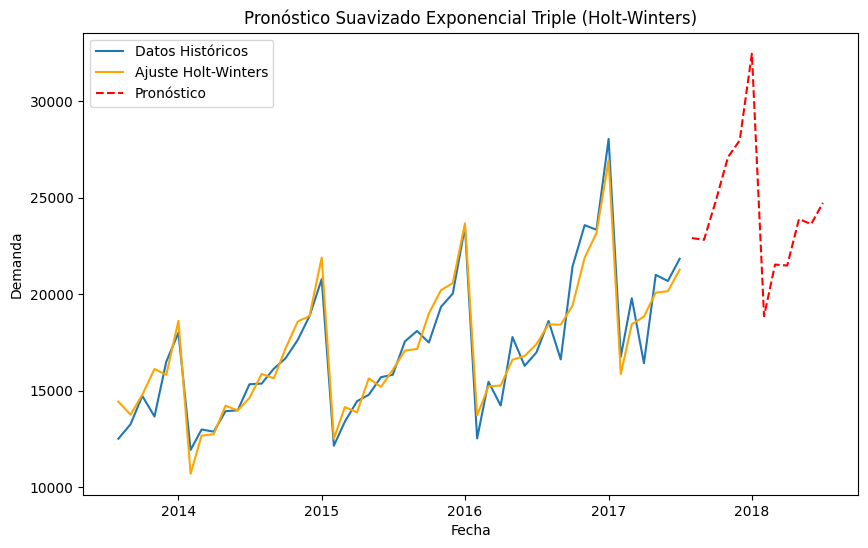

In [ ]:
# Ajustar el modelo Holt-Winters con los datos
# Se asume que tus datos son mensuales y que tienes estacionalidad.
# Ajustamos el 'seasonal' a 'add' o 'mul' dependiendo de la naturaleza de la estacionalidad.
model = ExponentialSmoothing(df['demanda'],
                             trend='mul',  # 'add' para tendencia aditiva, 'mul' para multiplicativa
                             seasonal='mul',  # 'add' para estacionalidad aditiva, 'mul' para multiplicativa
                             seasonal_periods=12)  # 12 para datos mensuales
model_fit = model.fit()

# Pronóstico para los próximos 12 meses
forecast = model_fit.forecast(steps=12)

# Mostrar los pronósticos
print(forecast)

# Graficar los valores ajustados y el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(df['demanda'], label='Datos Históricos')
plt.plot(model_fit.fittedvalues, label='Ajuste Holt-Winters', color='orange')
plt.plot(forecast, label='Pronóstico', color='red', linestyle='dashed')
plt.title("Pronóstico Suavizado Exponencial Triple (Holt-Winters)")
plt.xlabel("Fecha")
plt.ylabel("Demanda")
plt.legend(loc='best')
plt.show()

Dado que el proceso de optimización del modelo no convergió correctamente, no pudo haber encontrado los parámetros óptimos, lo que podría afectarnos en la precisión de los pronósticos.

Grafico:
- `Línea Azul (Datos Históricos)`: Muestra los datos de demanda reales. Se observa una tendencia general ascendente con fluctuaciones estacionales.
- `Línea Naranja-Amarilla (Ajuste Holt-Winters)`: Muestra cómo el modelo Holt-Winters se ajusta a los datos históricos. Captura la tendencia y la estacionalidad de los datos.
- `Línea Roja Discontinua (Pronóstico)`: Muestra el pronóstico del modelo para los próximos 12 meses. Se observa que el pronóstico continúa la tendencia ascendente y captura la estacionalidad.

- `MAPE (Error Porcentual Absoluto Medio)`: Las predicciones del modelo se desvían de los valores reales en un 4.86%.

- `RMSE (Raíz del Error Cuadrático Medio)`: El RMSE es de 1000.97 similar al MSE, pero da más peso a los errores grandes. La cercanía de estos valores sugiere que los errores del modelo son bastante consistentes y que no hay valores atípicos que estén distorsionando significativamente el RMSE.

- En resumen, los resultados de las métricas de error indican que el modelo de suavizado exponencial se ajusta bien a los datos. Los errores son relativamente bajos y están distribuidos de manera uniforme, lo que sugiere que el modelo es adecuado para realizar predicciones precisas.

In [ ]:
# Ajustar el modelo aditivo
model_add = ExponentialSmoothing(df['demanda'],
                                 trend='add',
                                 seasonal='add',
                                 seasonal_periods=12).fit()

# Ajustar el modelo multiplicativo
model_mul = ExponentialSmoothing(df['demanda'],
                                 trend='add',
                                 seasonal='mul',
                                 seasonal_periods=12).fit()

# Pronóstico para los próximos 12 meses
forecast_add = model_add.forecast(steps=12)
forecast_mul = model_mul.forecast(steps=12)

# Crear la figura interactiva con Plotly
fig = go.Figure()

# Datos históricos
fig.add_trace(go.Scatter(x=df.index, y=df['demanda'],
                         mode='lines', name='Datos Históricos'))

# Ajuste y pronóstico aditivo
fig.add_trace(go.Scatter(x=df.index, y=model_add.fittedvalues,
                         mode='lines', name='Ajuste Aditivo', line=dict(color='red')))
fig.add_trace(go.Scatter(x=forecast_add.index, y=forecast_add,
                         mode='lines', name='Pronóstico Aditivo', line=dict(color='red', dash='dash')))

# Ajuste y pronóstico multiplicativo
fig.add_trace(go.Scatter(x=df.index, y=model_mul.fittedvalues,
                         mode='lines', name='Ajuste Multiplicativo', line=dict(color='green')))
fig.add_trace(go.Scatter(x=forecast_mul.index, y=forecast_mul,
                         mode='lines', name='Pronóstico Multiplicativo', line=dict(color='green', dash='dash')))

# Configuración del gráfico
fig.update_layout(title="Comparación de Pronósticos: Holt-Winters (Aditivo vs Multiplicativo)",
                  xaxis_title="Fecha",
                  yaxis_title="Demanda",
                  hovermode="x")

# Mostrar la gráfica interactiva
fig.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Podemos observar la estacionalidad de los datos con picos y valles que se repiten a intervalos regulares. Ambos modelos capturan esta *estacionalidad, pero con ligeras variaciones en la magnitud de las fluctuaciones*.

**Tendencia (dirección general de los datos)**:
Se observa una tendencia general ascendente en la demanda a lo largo del tiempo.
Ambos modelos proyectan una continuación de esta tendencia en sus pronósticos.

**Diferencias entre Modelos**:
Las diferencias entre los pronósticos aditivo y multiplicativo son más notables hacia el final del período de pronóstico. Esto nos sugiere que la elección entre un modelo aditivo y multiplicativo puede tener un impacto significativo en las predicciones a largo plazo. Esto significa que a corto plazo, ambos modelos pueden dar resultados similares, pero a largo plazo, las predicciones pueden variar significativamente.

- `Línea Azul (Datos Históricos)`: Muestra los datos de demanda reales.
- `Línea Roja (Ajuste Aditivo)`: Muestra cómo el modelo Holt-Winters aditivo se ajusta a los datos históricos.
- `Línea Roja Discontinua (Pronóstico Aditivo)`: Muestra el pronóstico del modelo aditivo para los próximos 12 meses.
- `Línea Verde (Ajuste Multiplicativo)`: Muestra cómo el modelo Holt-Winters multiplicativo se ajusta a los datos históricos.
- `Línea Verde Discontinua (Pronóstico Multiplicativo)`: Muestra el pronóstico del modelo multiplicativo para los próximos 12 meses.




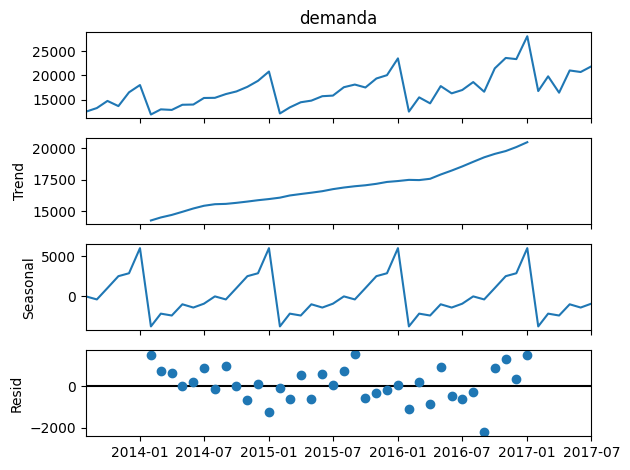

In [ ]:
# Descomposición de la serie temporal
result = seasonal_decompose(df['demanda'], model='additive', period=12)  # Ajustar el 'period' si tus datos son mensuales (12)
# model='additive' -> tendencia + estacionalidad + residuos
result.plot()
plt.show()

- `Serie Original ("demanda")`: El primer subgráfico muestra la serie temporal original de la demanda. Podemos observar una tendencia general ascendente y fluctuaciones estacionales.
- `Tendencia ("Trend")`: El segundo subgráfico muestra la tendencia de la serie temporal. Podemos observar una tendencia ascendente, lo que indica que la demanda general está aumentando con el tiempo.
- `Estacionalidad ("Seasonal")`: El tercer subgráfico muestra el componente estacional de la serie temporal. Podemos observar un patrón estacional claro, con picos y valles que se repiten cada 12 meses. Los valores positivos indican que la demanda es superior a la media en esos períodos, y los valores negativos indican que es inferior.
- `Residuos ("Resid")`: El cuarto subgráfico muestra los residuos (o errores) de la descomposición. Los residuos representan la parte de la serie temporal que no se explica por la tendencia o la estacionalidad. Idealmente, los residuos deberían ser aleatorios y tener una media cercana a cero. Podemos observar los residuos parecen ser bastante aleatorios, lo que sugiere que el modelo aditivo es apropiado para la descomposición.


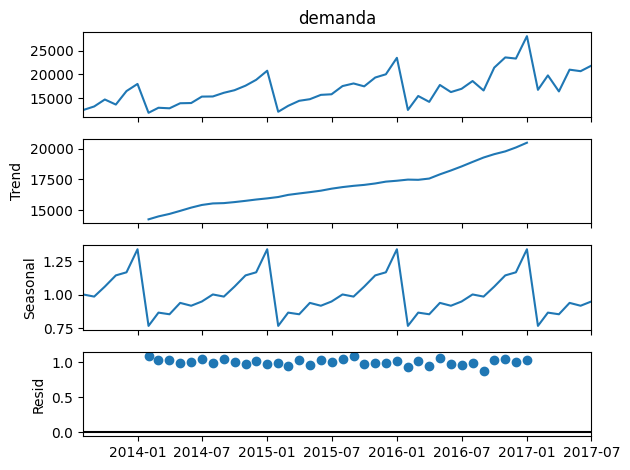

In [ ]:
# Descomposición de la serie temporal
result = seasonal_decompose(df['demanda'], model='mul', period=12)  # Ajustar el 'period' si tus datos son mensuales (12)
# model='additive' -> tendencia + estacionalidad + residuos
result.plot()
plt.show()

Aditivo: Si las fluctuaciones (estacionalidad) parecen tener una magnitud constante, el modelo aditivo es una buena opción.


Multiplicativo: Si las fluctuaciones estacionales parecen aumentar a medida que el nivel de la serie aumenta, el modelo multiplicativo es más adecuado.

Conclusion: El modelo Multiplicativo funciona mejor.

In [ ]:
train = df['demanda'][:36]
test = df['demanda'][36:48]

# Modelo Holt-Winters (Multiplicativo)
modelo_hw = ExponentialSmoothing(train, seasonal="mul", seasonal_periods=12).fit()
forecast_hw = modelo_hw.forecast(steps=len(test))

# Cálculo de métricas
def calcular_metricas(y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100
    return mae, mse,  mape

mae_hw, rmse_hw, mape_hw = calcular_metricas(test, forecast_hw)

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['demanda'], mode='lines', name='Demanda Real'))
fig.add_trace(go.Scatter(x=test.index, y=forecast_hw, mode='lines', name='Pronóstico Holt-Winters', line=dict(dash='dot')))

fig.add_annotation(
    x=0.75, y=0.98, xref="paper", yref="paper",
    text=f"Holt-Winters - MAE: {mae_hw:.2f} | RMSE: {rmse_hw:.2f}% |  MAPE: {mape_hw:.2f}%",
    showarrow=False, align="left", bordercolor="#cccccc", borderwidth=1, borderpad=4
)

fig.update_layout(title='Comparación de Predicciones (Holt-Winters)',
                  xaxis_title='Índice de Tiempo', yaxis_title='Demanda')
fig.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



# Modelo ARIMA

## Convirtiendo la serie en una estacionaria

Antes de utilizar el modelo ARIMA tenemos que asegurarnos que nuestra data muestra estacionalidad, ya que el modelo asume que la media, varianza y la covarianza son constantes a lo largo del tiempo. Para tener una serie estacionaria debemos eliminar la tendencia y estacionalidad en nuestra serie ya que de no hacerlo, esto puede causar predicciones incorrectas.

Ya sabemos que nuestra serie tienen tendencia y estacionalidad (patrones estacionales) pero haremos la prueba Dickey-Fuller para comprobar si la serie es o no es estacionaria. Si el valor p ser mayor que 0.05 esto nos indicara que la serie NO es estacionaria.


In [ ]:
# Prueba ADF
result = adfuller(df['demanda'])
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

if result[1] < 0.05:
    print("La serie es estacionaria")
else:
    print("La serie NO es estacionaria")

Estadístico ADF: -2.428629165364694
Valor p: 0.13381851925702815
La serie NO es estacionaria


Al llegar a la conclusion que nuestra serie NO es estacionaria, debemos hacer una diferenciación. Las diferenciaciones nos ayudaran a eliminar la tendencia y estacionalidad (patrones) de la serie.

En nuestro caso, haremos 2 diferenciaciones. Empezemos con la primera.

### Primera Diferenciación

La primera diferenciacion sera una simple donde se eliminara la tendencia.

In [ ]:
# Primera diferenciación para eliminar tendencia
df['demanda_diff'] = df['demanda'].diff(1)

Despues de la primera diferenciación correremos otra vez la prueba ADF para ver si nuestra serie ya es estacionaria o no.

In [ ]:
result = adfuller(df['demanda_diff'].dropna())
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

if result[1] < 0.05:
    print("La serie ahora es estacionaria")
else:
    print("La serie sigue sin ser estacionaria")

Estadístico ADF: -10.70576562916197
Valor p: 3.431041552114906e-19
La serie ahora es estacionaria


Nuestra serie ya es estacionaria, sin embargo como quiera estaremos haciendo la segunda diferenciación ya que nuestra serie tiene patrones estacionales que tenemos que eliminar para lograr hacer predicciones correctas.


Antes de la segunda diferenciación ya que nuestra serie es estacionaria podemos obtener los primeros valores que utilizaremos en el Modelo ARIMA(p, d, q).
Haremos el ACF para identificar el valor de q y PACF para obtener el valor de p.

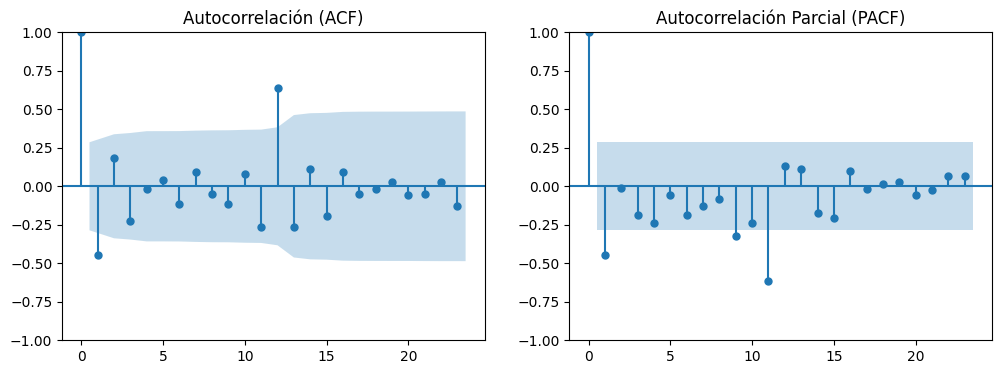

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF para identificar q
plot_acf(df['demanda_diff'].dropna(), lags=23, ax=axes[0])
axes[0].set_title("Autocorrelación (ACF)")

# PACF para identificar p
plot_pacf(df['demanda_diff'].dropna(), lags=23, ax=axes[1])
axes[1].set_title("Autocorrelación Parcial (PACF)")

plt.show()


La q será el orden de la parte de la media móvil y en el gráfico ACF observamos que despues de la primera piruleta las siguientes 10 piruletas estan dentro del intervalo de confianza (dentro de la capa azul) y son valores NO significativos. **La variable 'q' sera 1** y sera suficiente para capturar la dinamica de la serie.

En el caso del gráfico PACF, sucede lo mismo. Despues de la primera piruleta, los siguientes 7 piruletas NO son significativos. **La variable 'p' sera 1**.

Para la variable **'d', este será 1** ya que se hizo una diferenciación para lograr convertir la serie en estacionaria.

### Segunda Diferenciación

Ya que la serie es estacionaria, haremos una segunda diferenciacion ya que nuestra serie tiene estacionalidad y necesitamos eliminar los patrones de estaciones.

In [ ]:
# Segunda diferenciación para eliminar estacionalidad
df['demanda_double_diff'] = df['demanda_diff'].diff(12)

In [ ]:
# Prueba de ADF
result = adfuller(df['demanda_double_diff'].dropna())
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

if result[1] < 0.05:
    print("La serie ahora es estacionaria")
else:
    print("La serie sigue sin ser estacionaria")

Estadístico ADF: -10.612363650198073
Valor p: 5.789959213874166e-19
La serie ahora es estacionaria


Despues de la segunda diferenciación, podemos observar en el grafico que no tenemos patrones de tendencia o estacionalidad.

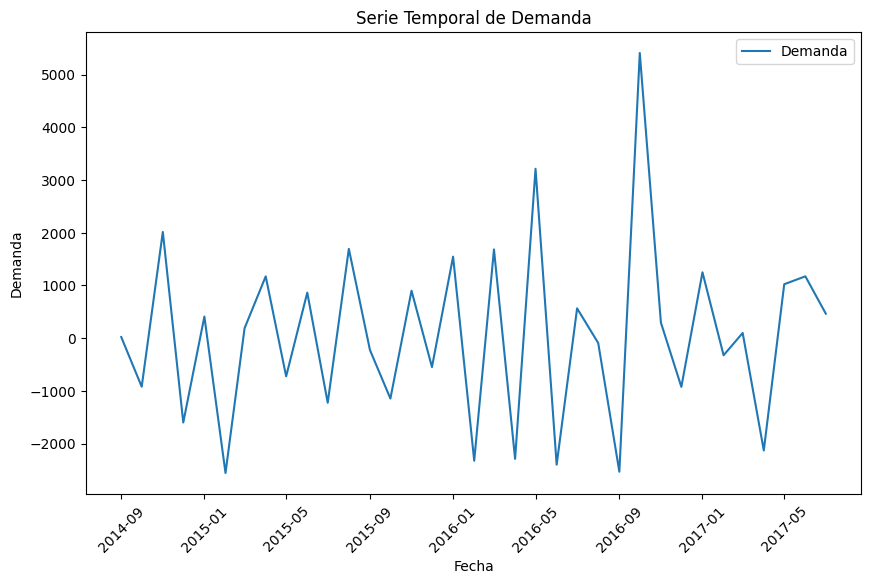

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['demanda_double_diff'], label='Demanda')
plt.title('Serie Temporal de Demanda')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Tambien verificamos que los residuos sean estacionarios.

In [ ]:
result = seasonal_decompose(df['demanda_double_diff'].dropna(), model='additive', period=12)
# Prueba ADF sobre los residuos
residual_adf = adfuller(result.resid.dropna())
print('Estadístico ADF:', residual_adf[0])
print('p-value:', residual_adf[1])

if residual_adf[1] < 0.05:
    print("Los residuos son estacionarios")
else:
    print("Los residuos NO son estacionarios")

Estadístico ADF: -8.695417111466538
p-value: 3.937099236574244e-14
Los residuos son estacionarios


Al los residuos estar estacionarios esto nos deja saber que la diferenciación elimino la tendencia y estacionalidad correctamente. Los residuos estan actuando como ruido blanco y esto es una buena señal ya que significa que la los residuos no muestran patrones y que la varianza es constante.

Despues de hacer la diferenciación para eliminar patrones estacionales, volvemos hacer el ACF y PACF. Esta vez para determinar los valores del seasonal_order que son (P, D, Q, S).


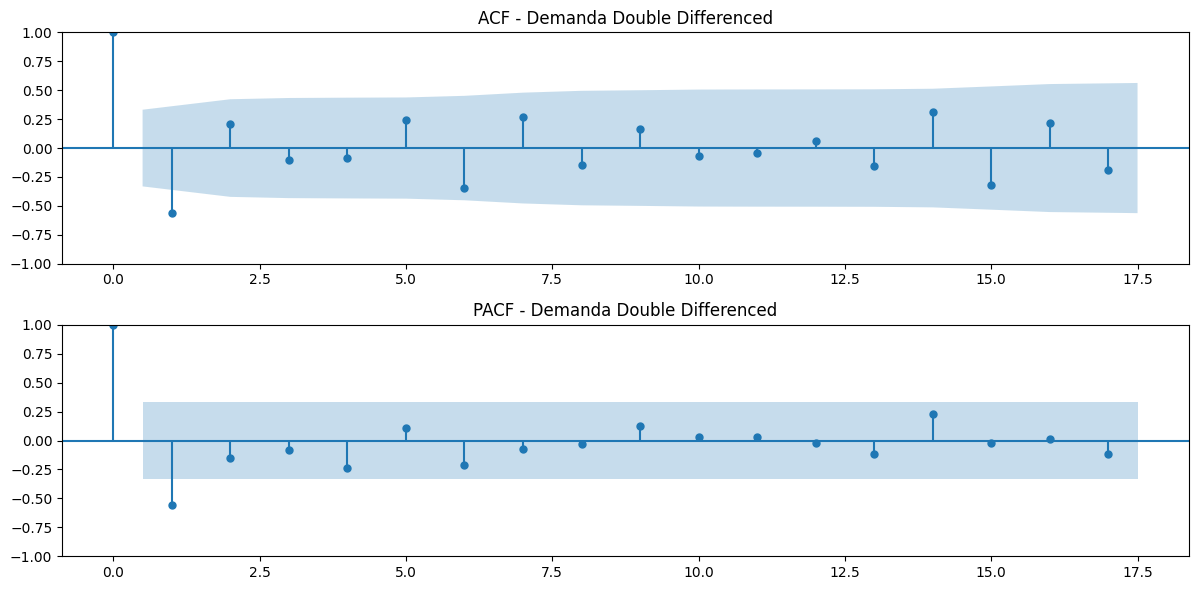

In [ ]:
# ACF y PACF para demanda_double_diff
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(211)
plot_acf(df['demanda_double_diff'].dropna(), lags=17, ax=plt.gca())
plt.title('ACF - Demanda Double Differenced')

# PACF
plt.subplot(212)
plot_pacf(df['demanda_double_diff'].dropna(), lags=17, ax=plt.gca())
plt.title('PACF - Demanda Double Differenced')

plt.tight_layout()
plt.show()

Para obtener los valores de P y Q observaremos si hay piruletas significativas (fuera de la capa del intervalo de confianza) en las epocas estacionales. En nuestro caso, 12 ya que nuestra serie tenia patrones que se observaban cada 12 meses.

Como podemos ver en ambos gráficos, las piruletas que se encuentran en el valor 12 estan dentro del intervalo de confianza y no son significativos. Esto nos deja saber que **Q = 0** y **P = 0**.

Para obtener el valor de D, ya que hicimos una diferenciación para eliminar el patron de estaciones, **D será 1**.

En el caso de **S, este será 12** ya que ese el patrón de la serie original.

Uniendo todos los valores que hemos obtenido, nuestro primer modelo ARIMA será:
* ARIMA(1, 1, 1)(0, 1, 0, 12)

## Primero modelo ARIMA

In [ ]:
modelo = ARIMA(df['demanda'],
                       order=(1, 1, 1),  # ARIMA(p, d, q)
                       seasonal_order=(0, 1, 0, 12))  # Estacionalidad (P, D, Q, 12)

modelo_entrenado = modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                     SARIMAX Results                                     
Dep. Variable:                           demanda   No. Observations:                   48
Model:             ARIMA(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -306.030
Date:                           Tue, 25 Mar 2025   AIC                            618.061
Time:                                   20:46:37   BIC                            622.727
Sample:                               08-01-2013   HQIC                           619.672
                                    - 07-01-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4261      0.424     -1.005      0.315      -1.257       0.405
ma.L1          0.0633      0.480      0.132

Podemos observar que en nuestro primer intenteo tenemos ar.L1 y ma.L1 como coeficientes insignificativos. Esto nos puede indicar el modelo no está capturando adecuadamente la dinámica de la serie temporal.


Intentemos el auto_arima, para ver que nos sugiere el sistema.

In [ ]:
auto_arima_model = auto_arima(df['demanda'], seasonal=True, m=12, stepwise=True, trace=True)

print("Sugerido ARIMA(p, d, q):", auto_arima_model.order)

print(auto_arima_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=637.285, Time=5.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=634.116, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=633.453, Time=2.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=635.176, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=671.953, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=633.464, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=637.055, Time=1.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=634.114, Time=1.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=634.831, Time=0.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=635.590, Time=4.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=635.732, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=635.850, Time=3.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=633.468, Time=2.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=635.491, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=635.346, Time=1.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(1,1,0)[12]             : AIC=651.454, Time=1.75 sec

Best model:  ARIMA(1,0,0)(1,1,0)[12] intercept
Total fit time: 27.241 seconds
Sugerido ARIMA(p, d, q): (1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -312.726
Date:                            Tue, 25 Mar 2025   AIC                            633.453
Time:                                    20:47:04   BIC                            639.787
Sample:                                08-01-2013   HQIC                           635.664
                                     - 07-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

Auto_ARIMA menciona dos mejores modelos, a veces sugiere:
   * Best model: ARIMA(1,0,0)(0,1,0)[12] intercept

    Total fit time: 2.629 seconds

    Sugerido ARIMA(p, d, q): (1, 0, 0)

   * Best model:  ARIMA(1,0,0)(1,1,0)[12] intercept

    Total fit time: 6.211 seconds

    Sugerido ARIMA(p, d, q): (1, 0, 0)

Intentaremos los dos y analizaremos.

In [ ]:
modelo = ARIMA(df['demanda'], order=(1, 0, 0), seasonal_order=(0,1,0,12))
modelo_entrenado = modelo.fit()

print(modelo_entrenado.summary())

                                    SARIMAX Results                                     
Dep. Variable:                          demanda   No. Observations:                   48
Model:             ARIMA(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -322.810
Date:                          Tue, 25 Mar 2025   AIC                            649.621
Time:                                  20:47:05   BIC                            652.788
Sample:                              08-01-2013   HQIC                           650.726
                                   - 07-01-2017                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5438      0.052     10.513      0.000       0.442       0.645
sigma2      3.368e+06   9.08e+05      3.709      0.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
modelo = ARIMA(df['demanda'], order=(1, 0, 0), seasonal_order=(1,1,0,12))
modelo_entrenado = modelo.fit()

print(modelo_entrenado.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                    SARIMAX Results                                     
Dep. Variable:                          demanda   No. Observations:                   48
Model:             ARIMA(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -322.727
Date:                          Tue, 25 Mar 2025   AIC                            651.454
Time:                                  20:47:07   BIC                            656.205
Sample:                              08-01-2013   HQIC                           653.113
                                   - 07-01-2017                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4777      0.075      6.399      0.000       0.331       0.624
ar.S.L12       0.0932      0.107      0.868      0.

Comparando los dos modelos sugeridos, se observa como ARIMA(1, 0, 0)x(0, 1, 0, 12) muestra unos AIC y BIC mas bajos y sus coefiecientes son todos significativos. El modeo ARIMA(1,0,0)(0,1,0)[12] presenta un mejor ajuste.

Comparando ese modelo ARIMA(1, 0, 0)x(0, 1, 0, 12) con el primer modelo ARIMA(1, 1, 1)x(0, 1, 0, 12).
 * ARIMA(1, 0, 0)x(0, 1, 0, 12)
    * AIC 651.454
    * BIC 656.205
    * Todos los coeficientes son significativos

 * ARIMA(1, 1, 1)x(0, 1, 0, 12)
    * AIC 649.621
    * BIC 622.727
    * Tiene coeficientes NO significativos

Cada modelo tiene sus pros y cons, haremos una mezcla de los dos para nuestro proximo modelo.

**ARIMA(1,1,0)(0,1,0,12)**

Vamos a mantener **d=1** ya que sabemos que la serie no era estacionaria y el modelo cuando d=0 era un peor modelo ya que tenía un AIC y BIC más alto. Tambien, **q=0** ya que en el modelo donde q=1, el componente MA (media móvil) era un coeficiente no significativo y parece no aportar al modelo ni mejorar el ajuste.


In [ ]:
modelo = ARIMA(df['demanda'], order=(1, 1, 0), seasonal_order=(0,1,0,12))
modelo_entrenado = modelo.fit()

print(modelo_entrenado.summary())

                                    SARIMAX Results                                     
Dep. Variable:                          demanda   No. Observations:                   48
Model:             ARIMA(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -306.046
Date:                          Tue, 25 Mar 2025   AIC                            616.092
Time:                                  20:47:07   BIC                            619.203
Sample:                              08-01-2013   HQIC                           617.166
                                   - 07-01-2017                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3762      0.082     -4.566      0.000      -0.538      -0.215
sigma2      2.062e+06    4.3e+05      4.797      0.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Este modelo tiene el mejor ajuste de todos los anteriores. Sus coeficientes son significativos lo que confirma que no era necesario incluir la media móvil en el modelo. El valor de sigma2 es el más bajo comparado con los otros modelos y esto nos asegura que tenemos menos ruido en las predicciones.

Haremos la prueba de Ljung-Box para observar que los residuos no tengan autocorrelación significativa.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuos = modelo_entrenado.resid

# Realizar la prueba de Ljung-Box para los residuos
resultado_ljungbox = acorr_ljungbox(residuos, lags=20)
print(resultado_ljungbox)

      lb_stat  lb_pvalue
1    0.478521   0.489093
2    0.481101   0.786195
3    0.779838   0.854283
4    1.198769   0.878301
5    1.497126   0.913401
6    1.532074   0.957336
7    1.556987   0.980271
8    1.924965   0.983226
9    2.022390   0.991109
10   2.023954   0.996153
11   2.050792   0.998309
12   9.197854   0.685945
13   9.845919   0.706483
14   9.865529   0.771947
15   9.865537   0.828112
16   9.904847   0.871550
17  10.170196   0.896322
18  10.207485   0.924923
19  10.282117   0.945640
20  10.515902   0.957824


Los residuos no tienen autocorrelación significativa.

### Validando MSE, RMSE y MAE de los modelos

Estaremos comparando los 3 modelos que hemos realizado para evalur su capacidad de predicción. Aun así el mejor modelo sigue siendo:
  * **ARIMA(1, 1, 0)x(0, 1, 0, 12)**

In [ ]:
# División en entranamiento y prueba
# De 48 observaciones
train = df['demanda'][:36]
test = df['demanda'][36:48]

# Modelos ARIMA con diferentes órdenes
modelo1 = ARIMA(train, order=(1, 1, 1), seasonal_order=(0,1,0,12)).fit()
modelo2 = ARIMA(train, order=(1, 0, 0), seasonal_order=(0,1,0,12)).fit()
modelo3 = ARIMA(train, order=(1, 1, 0), seasonal_order=(0,1,0,12)).fit()

# Predicciones
forecast1 = modelo1.forecast(steps=len(test))
forecast2 = modelo2.forecast(steps=len(test))
forecast3 = modelo3.forecast(steps=len(test))

# Crear gráfico interactivo
fig = go.Figure()

# Agregar serie real
fig.add_trace(go.Scatter(
    x=df.index, y=df['demanda'],
    mode='lines', name='Demanda Real',
    line=dict(color='blue')
))

# Agregar predicciones de los tres modelos ARIMA
fig.add_trace(go.Scatter(
    x=test.index, y=forecast1,
    mode='lines', name='ARIMA(1,1,1)x(0,1,0,12)',
    line=dict(color='red', dash='dash')
))

fig.add_trace(go.Scatter(
    x=test.index, y=forecast2,
    mode='lines', name='ARIMA(1,0,0)x(0,1,0,12)',
    line=dict(color='green', dash='dash')
))

fig.add_trace(go.Scatter(
    x=test.index, y=forecast3,
    mode='lines', name='ARIMA(1,1,0)x(0,1,0,12)',
    line=dict(color='black', dash='dash')
))

# Línea vertical para separar entrenamiento y prueba
fig.add_vline(x=df.index[36], line=dict(color="gray", dash="dash"))

# Personalizar diseño
fig.update_layout(
    title='Predicción vs. Datos Reales para Tres Modelos de ARIMA',
    xaxis_title='Índice de Tiempo',
    yaxis_title='Demanda',
    legend_title="Modelos",
    template="plotly_white"
)

fig.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so

Podemos observar en el gráfico que todos los modelos estan muy cercas uno del otro. Sin embargo, el modelo que tiene los picos mas altos es ARIMA(1, 1, 0)x(0, 1, 0, 12), el modelo que tenia el mejor AIC y BIC de todos.



Calcularemos el MSE, RMSE y MAE para los modelos, el modelo con los valores mas bajos es el mejor modelo.

In [ ]:
# Función para calcular MSE, RMSE y MAE
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# Calcular las métricas de error para cada modelo
mse1, rmse1, mae1 = calcular_metricas(test, forecast1)
mse2, rmse2, mae2 = calcular_metricas(test, forecast2)
mse3, rmse3, mae3 = calcular_metricas(test, forecast3)

# Resultados de las métricas
print("Modelo 1 (ARIMA(1,1,1)(0,1,0,12)):")
print(f"MSE: {mse1}, RMSE: {rmse1}, MAE: {mae1}\n")

print("Modelo 2 (ARIMA(1,0,0)(0,1,0,12)):")
print(f"MSE: {mse2}, RMSE: {rmse2}, MAE: {mae2}\n")

print("Modelo 3 (ARIMA(1,0,0)(0,1,0,12)):")
print(f"MSE: {mse3}, RMSE: {rmse3}, MAE: {mae3}\n")

Modelo 1 (ARIMA(1,1,1)(0,1,0,12)):
MSE: 9980120.628260635, RMSE: 3159.132891832921, MAE: 3008.0302598814887

Modelo 2 (ARIMA(1,0,0)(0,1,0,12)):
MSE: 13476996.475039959, RMSE: 3671.1028962751725, MAE: 3447.0395765418302

Modelo 3 (ARIMA(1,0,0)(0,1,0,12)):
MSE: 8283253.5943874465, RMSE: 2878.064209566466, MAE: 2687.4229358854827



Volvemos a comprobar que el modelo ARIMA(1, 1, 0)x(0, 1, 0, 12) es el mejor modelos de los 3.

In [ ]:
print("Modelo Seleccionado (ARIMA(1,0,0)(0,1,0,12)):")
print(f"MSE: {mse3}, RMSE: {rmse3}, MAE: {mae3}\n")

Modelo Seleccionado (ARIMA(1,0,0)(0,1,0,12)):
MSE: 8283253.5943874465, RMSE: 2878.064209566466, MAE: 2687.4229358854827



A partir de esto, concluimos que el modelo ARIMA(1, 1, 0)x(0, 1, 0, 12) es el mejor de todos y con este estaremos haciendo el pronóstico de los próximos 12 meses.

## Pronóstico

In [ ]:
modelo = ARIMA(df['demanda'],
                       order=(1, 1, 0),
                       seasonal_order=(0, 1, 0, 12))

modelo_entrenado = modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                    SARIMAX Results                                     
Dep. Variable:                          demanda   No. Observations:                   48
Model:             ARIMA(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -306.046
Date:                          Tue, 25 Mar 2025   AIC                            616.092
Time:                                  20:47:08   BIC                            619.203
Sample:                              08-01-2013   HQIC                           617.166
                                   - 07-01-2017                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3762      0.082     -4.566      0.000      -0.538      -0.215
sigma2      2.062e+06    4.3e+05      4.797      0.

In [ ]:
print(modelo_entrenado.forecast(3))

2017-08-01    23291.464963
2017-09-01    21368.116858
2017-10-01    26150.421694
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Pronóstico para los próximos 12 meses
pronostico_arima = modelo_entrenado.forecast(steps=12)

# Indice de fechas para el futuro
futuro = list(range(len(df), len(df) + 12))

fig = go.Figure()

# Datos de la serie original
fig.add_trace(go.Scatter(x=df.index, y=df['demanda'],
                         mode='lines+markers', line=dict(color='black'), name='Serie Original'))

# Pronóstico ARIMA
fig.add_trace(go.Scatter(x=pd.date_range(df.index[-1], periods=13, freq='M')[1:],
                         y=pronostico_arima,
                         mode='lines+markers',
                         line=dict(color='blue'), name='Pronóstico ARIMA'))

fig.update_layout(title="Pronóstico con ARIMA",
                  xaxis_title="Fecha",
                  yaxis_title="Demanda",
                  hovermode="x")
fig.show()


<ipython-input-49-72c52468b67c>:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
valor_inicial = pronostico_arima.iloc[0]  # Primer valor pronosticado
valor_final = pronostico_arima.iloc[-1]  # Último valor pronosticado

tasa_crecimiento_pronosticada = ((valor_final - valor_inicial) / valor_inicial) * 100

print(f"Tasa de Crecimiento Pronosticada: {tasa_crecimiento_pronosticada:.2f}%")


Tasa de Crecimiento Pronosticada: 14.04%


De cumplirse el pronostico, la demanda tendra un crecimiento proyectado para el futuro de 14.04%.

# Comparación entre modelo Alisado Triple y ARIMA

In [ ]:
train = df['demanda'][:36]
test = df['demanda'][36:48]

# Modelo ARIMA(1,1,0)x(0,1,0,12)
modelo_arima = ARIMA(train, order=(1, 1, 0), seasonal_order=(0, 1, 0, 12)).fit()
forecast_arima = modelo_arima.forecast(steps=len(test))

# Modelo Alisado Triple (Multiplicativo)**
modelo_hw = ExponentialSmoothing(train, seasonal="mul", seasonal_periods=12).fit()
forecast_hw = modelo_hw.forecast(steps=len(test))

# **Cálculo de métricas**
def calcular_metricas(y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100
    return mae, mse, mape

mae_arima, rmse_arima, mape_arima = calcular_metricas(test, forecast_arima)
mae_hw, rmse_hw, mape_hw = calcular_metricas(test, forecast_hw)


fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['demanda'], mode='lines', name='Demanda Real'))
fig.add_trace(go.Scatter(x=test.index, y=forecast_arima, mode='lines', name='Pronóstico ARIMA', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=test.index, y=forecast_hw, mode='lines', name='Pronóstico Holt-Winters', line=dict(dash='dot')))

fig.add_annotation(
    x=0.75, y=0.98, xref="paper", yref="paper",
    text=f"ARIMA - MAE: {mae_arima:.2f} | RMSE: {rmse_arima:.2f} | MAPE: {mape_arima:.2f}%",
    showarrow=False, align="left", bordercolor="#cccccc", borderwidth=1, borderpad=4
)
fig.add_annotation(
    x=0.75, y=0.92, xref="paper", yref="paper",
    text=f"Holt-Winters - MAE: {mae_hw:.2f} | RMSE: {rmse_hw:.2f} | MAPE: {mape_hw:.2f}%",
    showarrow=False, align="left", bordercolor="#cccccc", borderwidth=1, borderpad=4
)

fig.update_layout(title='Comparación de Predicciones (ARIMA vs Holt-Winters)',
                  xaxis_title='Índice de Tiempo', yaxis_title='Demanda')
fig.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



En la comparación de predicciones de los ultimos 12 meses con la serie original, ARIMA se acerca mas a los picoes de la serie original y tiene menos error. El modelo ARIMA se adapta mejor a los patrones estacionales y tendencia de la serie original.

Los valores de MAE, RMSE y MAPE para ARIMA tambien son mas bajos que el del Alisado Triple (Holt), esto tambien nos ayuda a concluir que ARIMA es el mejor modelos de los dos y ayuda a pronosticar mejor la demanda a futuro.